In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#热核函数,默认sigama=1
def rbf(dist, t = 1.0):
    return np.exp(-(dist/t))
#计算距离矩阵
def cal_pairwise_dist(x):
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    return dist

#计算邻接矩阵W：相似度矩阵
def cal_rbf_dist(data, n_neighbors = 10, t = 1):
    dist = cal_pairwise_dist(data)
    dist[dist < 0] = 0
    n = dist.shape[0]
    rbf_dist = rbf(dist, t)

    W = np.zeros((n, n))
    for i in range(n):
        index_ = np.argsort(dist[i])[1:1+n_neighbors]
        W[i, index_] = rbf_dist[i, index_]
        W[index_, i] = rbf_dist[index_, i]

    return W

In [3]:
#Laplacian Eigenmaps重构或降维
def le(data,n_dims = 2,n_neighbors = 5, t = 1.0,jump=True):

    N = data.shape[0]
    W = cal_rbf_dist(data, n_neighbors, t)
    D = np.zeros_like(W)
    for i in range(N):
        D[i,i] = np.sum(W[i])

    #矩阵求逆
    D_inv = np.linalg.inv(D)
    L = D - W
    #计算特征值和特征向量
    eig_val, eig_vec = np.linalg.eig(np.dot(D_inv, L))

    sort_index_ = np.argsort(eig_val)

    eig_val = eig_val[sort_index_]
    
    j = 0
    if jump==True:
        while eig_val[j] < 1e-6:
            j+=1

    sort_index_ = sort_index_[j:j+n_dims]
    eig_val_picked = eig_val[j:j+n_dims]
    # print(eig_val_picked)
    eig_vec_picked = eig_vec[:, sort_index_]

    X_ndim = eig_vec_picked
    return X_ndim


## 拟合数据集

y= [1. 2. 3. 4. 5. 6. 7.]


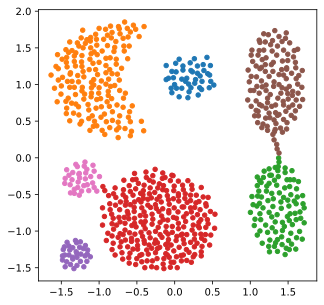

In [27]:
data=np.loadtxt('../data/data/synthetic/Aggregation.txt')
x=data[:,1:]
y=data[:,0]
print("y=",np.unique(y))
ss_x=StandardScaler()
x=ss_x.fit_transform(x)

plt.figure(figsize=[5,5])
for i in np.unique(y):
    plt.scatter(x[y==i,0],x[y==i,1],s=20)

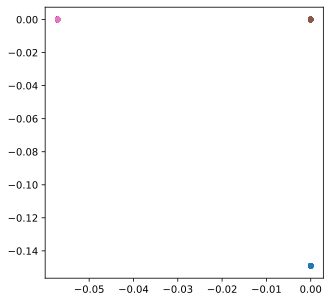

In [28]:
#LE重构
x_DR=le(x,2,10,1,jump=False)
plt.figure(figsize=(5,5))
for i in np.unique(y):
    plt.scatter(x_DR[y==i,0],x_DR[y==i,1],s=20)

## 瑞士卷例子

In [101]:
#画漂亮的3维图
import pandas as pd
import plotly.express as px # 数据可视化
def chart(X, y):
  #--------------------------------------------------------------------------#
  # This section is not mandatory as its purpose is to sort the data by label 
  # 这个部分不是强制性的，因为它的目的是按标签对数据进行排序
  # so, we can maintain consistent colors for digits across multiple graphs
    #我们可以在多个图中为数字保持一致的颜色
   
  # Concatenate X and y arrays  连接X和y数组
  arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
  # Create a Pandas dataframe using the above array
  df=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'label'])
  # Convert label data type from float to integer 将标签数据类型从浮点数转换为整数
  df['label'] = df['label'].astype(int)
  # Finally, sort the dataframe by label  根据标签对数据进行排序
  df.sort_values(by='label', axis=0, ascending=True, inplace=True)
  #--------------------------------------------------------------------------#
   
  # Create a 3D graph
  fig = px.scatter_3d(df, x='x', y='y', z='z', color=df['label'].astype(str), height=900, width=950)

  # Update chart looks
  fig.update_layout(title_text='UMAP',
                    showlegend=True,
                    legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                    scene_camera=dict(up=dict(x=0, y=0, z=1),
                                          center=dict(x=0, y=0, z=-0.1),
                                          eye=dict(x=1.5, y=-1.4, z=0.5)),
                                          margin=dict(l=0, r=0, b=0, t=0),
                    scene = dict(xaxis=dict(backgroundcolor='white',
                                            color='black',
                                            gridcolor='#f0f0f0',
                                            title_font=dict(size=10),
                                            tickfont=dict(size=10),
                                            ),
                                  yaxis=dict(backgroundcolor='white',
                                            color='black',
                                            gridcolor='#f0f0f0',
                                            title_font=dict(size=10),
                                            tickfont=dict(size=10),
                                            ),
                                  zaxis=dict(backgroundcolor='lightgrey',
                                            color='black',
                                            gridcolor='#f0f0f0',
                                            title_font=dict(size=10),
                                            tickfont=dict(size=10),
                                            )))
  # Update marker size
  fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
   
  fig.show()

In [102]:
#瑞士卷数据集
def make_swiss_roll(n_samples, noise=0.0, random_state=None):
    #Generate a swiss roll dataset.
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
    x = t * np.cos(t)
    y = 83 * np.random.rand(1, n_samples)
    z = t * np.sin(t)
    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)
    return X, t

In [103]:
#瑞士卷三维图
X,t=make_swiss_roll(500,0)
XX=StandardScaler()
X=XX.fit_transform(X)
chart(X,t)

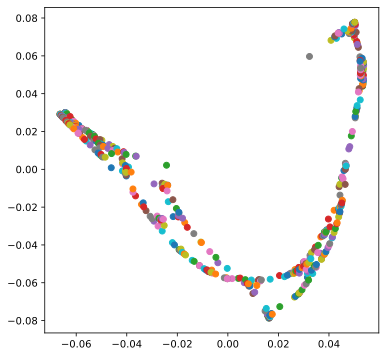

In [107]:
DR_X=le(X,2,5,1)
plt.figure(figsize=[6,6])
for i in np.unique(t):
    plt.scatter(DR_X[t==i,0],DR_X[t==i,1])

## 调包Laplacian Eigenmaps

D:\app\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, 'LE')

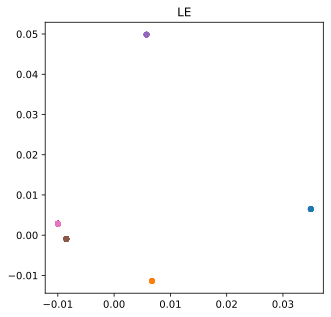

In [20]:
from sklearn.manifold import SpectralEmbedding

model_LE=SpectralEmbedding(n_components=2,n_neighbors=10)
output=model_LE.fit_transform(x)
plt.figure(figsize=(5,5))
for i in np.unique(y):
    plt.scatter(output[y==i,0],output[y==i,1],s=20)
plt.title("LE")